# Latent Dirichlet Allocation (LDA)

## Preprocess Data

In [1]:
#import packages
import pandas as pd
import ast
import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()

import math

In [3]:
# Read data
covid = pd.read_csv('all_276k.csv')
covid = covid[['Unnamed: 0','text', 'stemmer', 'month', 'date', 'SDI', 'Code', 'state', 'City', 'County']]
covid['county'] = covid.County.str.replace(' County', '')

case = pd.read_csv('hotspots.csv', names = ['county', 'state'])
case['hotspot'] = 'True'
covid = pd.merge(covid, case,  how='left', left_on=['state','county'], right_on = ['state','county'])
covid['hotspot'] = covid['hotspot'].fillna('False')

In [ ]:
#covid['SDI_level'] = covid.apply(lambda x: 'low' if x <=50 ('high' if x>50 else x) for x in covid['SDI'])
covid['SDI_level'] = pd.Series([])
covid['SDI_level_extreme'] = pd.Series([])
for i in range(len(covid)):
    if covid['SDI'][i] <=50:
        covid['SDI_level'][i] ='low'
    elif covid['SDI'][i] > 50:
        covid['SDI_level'][i] = 'high'
    if covid['SDI'][i] <=20:
        covid['SDI_level_extreme'][i] ='low'
    elif covid['SDI'][i] > 90:
        covid['SDI_level_extreme'][i] = 'high'

In [ ]:
covid_list = []
for r in covid['stemmer']:
    r = ast.literal_eval(r)
    covid_list.append(r)

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(covid_list)

# Create Corpus
texts = covid_list

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

## Build Model

In [2]:
import os
#set path to Mallet
os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8/'})
mallet_path = 'C:/new_mallet/mallet-2.0.8/bin/mallet' # update this path

In [6]:
#for choosing number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary, alpha= 5.0, random_seed = 750)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [38]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=covid_list, start=4, limit=16, step=1)

4
5
6
7
8
9
10
11
12
13
14
15


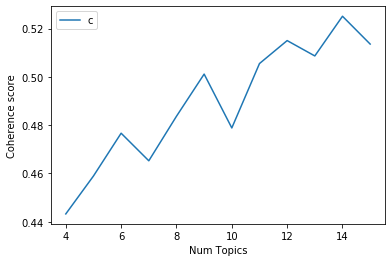

In [39]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline
limit=16; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('Unigram.png')
plt.show()

In [40]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 4  has Coherence Value of 0.4432
Num Topics = 5  has Coherence Value of 0.459
Num Topics = 6  has Coherence Value of 0.4767
Num Topics = 7  has Coherence Value of 0.4653
Num Topics = 8  has Coherence Value of 0.4837
Num Topics = 9  has Coherence Value of 0.5012
Num Topics = 10  has Coherence Value of 0.4789
Num Topics = 11  has Coherence Value of 0.5055
Num Topics = 12  has Coherence Value of 0.5151
Num Topics = 13  has Coherence Value of 0.5087
Num Topics = 14  has Coherence Value of 0.5251
Num Topics = 15  has Coherence Value of 0.5136


In [7]:
model_list_2, coherence_values_2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=covid_list, start=16, limit=26, step=1)

16
17
18
19
20
21
22
23
24
25


In [17]:
coherence_values.extend(coherence_values_2)

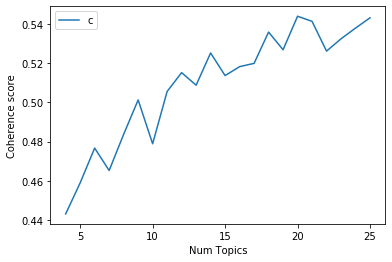

In [27]:
# Show graph
import matplotlib.pyplot as plt
%matplotlib inline
limit=26; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('Unigram.png')
plt.show()

In [20]:
ldamallet_19 = model_list_2[3]
model_topics_19 = ldamallet_19.show_topics(num_topics=19, formatted=False)
model_topics_19

[(0,
  [('coronaviru', 0.0929782425247405),
   ('case', 0.08138251730507085),
   ('state', 0.030916032786691767),
   ('confirm', 0.02793005977847149),
   ('counti', 0.024684436943449448),
   ('death', 0.02273116211000891),
   ('health', 0.02017597176898247),
   ('report', 0.018806909045845897),
   ('covid', 0.01592125528888994),
   ('offici', 0.013619813642237945)]),
 (1,
  [('coronaviru', 0.07419579290036406),
   ('news', 0.03422461886361095),
   ('covid', 0.01897916330156679),
   ('inform', 0.015698967483816457),
   ('updat', 0.01563063007094666),
   ('read', 0.015139843196699924),
   ('live', 0.01427009430562976),
   ('post', 0.011393710473019148),
   ('articl', 0.010629573947293218),
   ('watch', 0.010505324105711766)]),
 (2,
  [('coronaviru', 0.11062781607947451),
   ('watch', 0.017337549535855815),
   ('play', 0.015770045057271594),
   ('game', 0.011888605396015417),
   ('time', 0.010144671841919549),
   ('show', 0.009988599967428478),
   ('sport', 0.008461809890885403),
   ('mov

In [ ]:
ldamallet_26 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=26, id2word=id2word, alpha= 5.0, random_seed = 750)
pprint(ldamallet_26.print_topics(num_words=10, num_topics= 26))

In [ ]:
doc_26 = ldamallet_26.load_document_topics()
doc_26 = list(doc_26)

In [ ]:
ldamallet_41 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=41, id2word=id2word, alpha= 5.0, random_seed = 750)
pprint(ldamallet_41.print_topics(num_words=10, num_topics= 41))

In [ ]:
doc_41 = ldamallet_41.load_document_topics()
doc_41 = list(doc_41)

In [42]:
len(covid)

276416

In [90]:
ldamodel_26 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet_26)
vis_26 = pyLDAvis.gensim.prepare(ldamodel_26, corpus, id2word)
pyLDAvis.save_html(vis_26, 'Unigram_26.html')

In [126]:
ldamodel_41 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet_41)
vis_41 = pyLDAvis.gensim.prepare(ldamodel_41, corpus, id2word)
pyLDAvis.save_html(vis_41, 'Unigram_41.html')

## Get Topic Distribution

In [ ]:
from datetime import datetime
def topic_distribution(doc):
    print("Start")
    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    sent_topics_df = pd.DataFrame() 
    top_num = []
    for i in range(len(doc)):
        top_dist = []
        for j, (topic_num, prop_topic) in enumerate(doc[i]):
            top_dist.append(round(prop_topic,4))
            if i ==0:
                top_num.append('Topic '+ str(topic_num))
        sent_topics_df = sent_topics_df.append(pd.Series(top_dist), ignore_index=True)
    sent_topics_df.columns = top_num
    contents = pd.Series(texts)
    new_df= pd.concat([sent_topics_df, contents, covid], axis=1)
    print("End")
    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    return(new_df)

In [124]:
df_26 = topic_distribution(doc_26)
df_26.to_csv ('Unigram_26_TopDoc.csv', index = False, header=True)

In [4]:
df_41 = topic_distribution(doc_41)
df_41.to_csv ('Unigram_41_TopDoc.csv', index = False, header=True)

## Summary Stats

In [ ]:
AvgDist_Month_26 = df_26.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,-11]].groupby(['month']).mean().reindex(['January', 'February','March'])
AvgDist_SDI_26 = df_26.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,-2]].groupby(['SDI_level']).mean()
AvgDist_SDI_Extreme_26 = df_26.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,-1]].groupby(['SDI_level_extreme']).mean()
AvgDist_Hotspots_26 = df_26.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,-3]].groupby(['hotspot']).mean()

In [ ]:
AvgDist_Month_41 = df_41.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,-11]].groupby(['month']).mean().reindex(['January', 'February','March'])
AvgDist_SDI_41 = df_41.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,-2]].groupby(['SDI_level']).mean()
AvgDist_SDI_Extreme_41 = df_41.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,-1]].groupby(['SDI_level_extreme']).mean()
AvgDist_Hotspots_41 = df_41.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,-3]].groupby(['hotspot']).mean()

## Visualization - Average Distribution

In [ ]:
def plot_average_distribution_month(N,df):
    #N = 14
    jan = df.T['January'].tolist()

    fig, ax = plt.subplots()
    fig.set_size_inches(25, 10.5)

    ind = np.arange(N)    # the x locations for the groups
    width = 0.2         # the width of the bars
    ax.bar(ind, jan, width, label='January')

    feb = df.T['February'].tolist()
    ax.bar(ind + width, feb, width, label='February')

    mar = df.T['March'].tolist()
    ax.bar(ind + width*2, mar, width, label='March')

    ax.set_title('Average Distribution by Month')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels((i for i in df.T.index.tolist()), rotation=45)

    ax.legend()
    ax.autoscale_view()
    fig.savefig('Unigram_'+str(N)+'_AvgDist_Month.png')

    plt.show()

In [ ]:
plot_average_distribution_month(26, AvgDist_Month_26)

In [ ]:
plot_average_distribution_month(41, AvgDist_Month_41)

In [ ]:
def plot_average_distribution_SDI(N,df, extreme = False):
    #N = 14
    high = df.T['high'].tolist()

    fig, ax = plt.subplots()
    fig.set_size_inches(25, 10.5)

    ind = np.arange(N)    # the x locations for the groups
    width = 0.3         # the width of the bars
    ax.bar(ind, high, width, label='High SDI')

    low = df.T['low'].tolist()
    ax.bar(ind + width, low, width, label='Low SDI')

    if extreme == True:
        t = 'SDI_Extreme'
    else:
        t = 'SDI'

    ax.set_title('Average Distribution by '+ t)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels((i for i in df.T.index.tolist()), rotation=45)

    ax.legend()
    ax.autoscale_view()
    fig.savefig('Unigram_'+str(N)+'_AvgDist_'+t+'.png')

    plt.show()

In [ ]:
plot_average_distribution_SDI(26,AvgDist_SDI_26)

In [ ]:
plot_average_distribution_SDI(26,AvgDist_SDI_Extreme_26, extreme= True)

In [ ]:
plot_average_distribution_SDI(41,AvgDist_SDI_41)

In [ ]:
plot_average_distribution_SDI(41,AvgDist_SDI_Extreme_41, extreme= True)

## Get Dominant Topic

In [ ]:
def dominant_topic(N,df):
    df['Topic'] = 'None'
    num_list = [x for x in range(N)]
    for i in range(len(df)):
        for j in range(0,N):
            if df.iloc[i, j] == max(df.iloc[i, num_list]):
                df['Topic'][i] = df.columns[j]
                break
    return df

In [ ]:
df_26_with_Top = dominant_topic(26,df_26)
df_41_with_Top = dominant_topic(41,df_41)

In [ ]:
df_26_with_Top.to_csv('Unigram_26_DominantTopic.csv', index = False, header=True)
df_41_with_Top.to_csv('Unigram_41_DominantTopic.csv', index = False, header=True)

## Odd Calculation & Visualization

In [ ]:
def cnt_matrix_month(N, df):
    tm = pd.DataFrame(0, index = ['January', 'February', 'March'], columns=['Topic '+ str(i) for i in range(0,N)])
    n = 0
    for i in range(len(df)):
        try:
            tm[df['Topic'][i]][df['month'][i]] +=1
        except:
            n+=1
    return tm

In [3]:
def odd_matrix_month(N, df):
    ts = pd.DataFrame(0.0, index = ['January', 'February', 'March'], columns=['Topic '+ str(i) for i in range(0,N)])
    for i in range(0,len(df)):
        for j in range(N):
            ts.iloc[i][j] = df.iloc[i][j]/sum(df.iloc[i])
    return ts

In [2]:
def cnt_matrix_SDI(N, df, extreme = False):
    if extreme == True:
        t = 'SDI_level_extreme'
    else:
        t = 'SDI_level'
    ts = pd.DataFrame(0, index = ['high', 'low'], columns=['Topic '+ str(i) for i in range(0,N)])
    n = 0
    for i in range(len(df)):
        try:
            ts[df['Topic'][i]][df[t][i]] +=1
        except:
            n+=1
    return ts

In [1]:
def odd_matrix_SDI(N, df):
    ts = pd.DataFrame(0.0, index = ['high', 'low'], columns=['Topic '+ str(i) for i in range(0,N)])
    for i in range(0,len(df)):
        for j in range(N):
            ts.iloc[i][j] = df.iloc[i][j]/sum(df.iloc[i])
    return ts

In [ ]:
def plot_log_odds_SDI(N, df, extreme = False):
    plot_df = df.T
    plot_df['OR'] = [math.log(x) for x in (plot_df['high'] / plot_df['low']).tolist()]
    plot_df = plot_df.reset_index()
    plot_df['colors'] = ['red' if x < 0 else 'green' for x in plot_df['OR']]
    plot_df.sort_values('OR', inplace=True)
    plot_df.reset_index(inplace = True)

    # Draw plot
    plt.figure(figsize=(14,10), dpi= 80)
    plt.hlines(y=plot_df.index, xmin=0, xmax=plot_df.OR, color=plot_df.colors, alpha=0.4, linewidth=10)

    t = 'SDI_Extreme'

    # Decorations
    plt.gca().set(ylabel='$Topics$', xlabel='$Log Odds Ratio$')
    plt.yticks(plot_df.index, plot_df['index'], fontsize=12)
    plt.title('Log Odds Ratio for High and Low ' + t, fontdict={'size':20})
    plt.grid(linestyle='--', alpha=0.5)
    
    custom_lines = [Line2D([0], [0], color='lightcoral', lw=4),
                    Line2D([0], [0], color='darkseagreen', lw=4)]
    plt.legend(custom_lines, ['Low', 'High'], loc = 'lower right')
    plt.savefig('Unigram_'+str(N)+'_LogOdds_'+ t +''.png')
    plt.show()

In [ ]:
cntSDI_26 = cnt_matrix_SDI(26, df_26_with_Top)
oddSDI_26 = odd_matrix_SDI(26, cntSDI_26)
plot_log_odds_SDI(26, oddSDI_26)

In [ ]:
cntSDI_Extreme_26 = cnt_matrix_SDI(26, df_26_with_Top, extreme= True)
oddSDI_Extreme_26 = odd_matrix_SDI(26, cntSDI_Extreme_26)
plot_log_odds_SDI(26, oddSDI_Extreme_26, extreme= True)

In [ ]:
cntSDI_41 = cnt_matrix_SDI(41, df_41_with_Top)
oddSDI_41 = odd_matrix_SDI(41, cntSDI_41)
plot_log_odds_SDI(41, oddSDI_41)

In [ ]:
cntSDI_Extreme_41 = cnt_matrix_SDI(41, df_41_with_Top, extreme= True)
oddSDI_Extreme_41 = odd_matrix_SDI(41, cntSDI_Extreme_41)
plot_log_odds_SDI(41, oddSDI_Extreme_41, extreme= True)

In [ ]:
def cnt_matrix_hotspot(N, df):
    ts = pd.DataFrame(0, index = ['True', 'False'], columns=['Topic '+ str(i) for i in range(0,N)])
    n = 0
    for i in range(len(df)):
        try:
            ts[df['Topic'][i]][str(df['hotspot'][i])] +=1
        except:
            n+=1
    return ts

In [ ]:
def odd_matrix_hotspot(N, df):
    ts = pd.DataFrame(0.0, index = ['True', 'False'], columns=['Topic '+ str(i) for i in range(0,N)])
    for i in range(0,len(df)):
        for j in range(N):
            ts.iloc[i][j] = df.iloc[i][j]/sum(df.iloc[i])
    return ts

In [ ]:
def plot_log_odds_hotspot(N, df):
    plot_df = df.T
    plot_df['OR'] = [math.log(x) for x in (plot_df['True'] / plot_df['False']).tolist()]
    plot_df = plot_df.reset_index()
    plot_df['colors'] = ['red' if x < 0 else 'green' for x in plot_df['OR']]
    plot_df.sort_values('OR', inplace=True)
    plot_df.reset_index(inplace = True)

    # Draw plot
    plt.figure(figsize=(14,10), dpi= 80)
    plt.hlines(y=plot_df.index, xmin=0, xmax=plot_df.OR, color=plot_df.colors, alpha=0.4, linewidth=10)

    # Decorations
    plt.gca().set(ylabel='$Topics$', xlabel='$Log Odds Ratio$')
    plt.yticks(plot_df.index, plot_df['index'], fontsize=12)
    plt.title('Log Odds Ratio for Hotspots', fontdict={'size':20})
    plt.grid(linestyle='--', alpha=0.5)
    
    custom_lines = [Line2D([0], [0], color='lightcoral', lw=4),
                    Line2D([0], [0], color='darkseagreen', lw=4)]
    plt.legend(custom_lines, ['False', 'True'], loc = 'lower right')
    plt.savefig('Unigram_'+str(N)+'_LogOdds_hotspot.png')
    plt.show()

In [ ]:
cntHS_26 = cnt_matrix_hotspot(26, df_26_with_Top)
oddHS_26 = odd_matrix_hotspot(26, cntHS_26)
plot_log_odds_hotspot(26, oddHS_26)

In [ ]:
cntHS_41 = cnt_matrix_hotspot(41, df_41_with_Top)
oddHS_41 = odd_matrix_hotspot(41, cntHS_41)
plot_log_odds_hotspot(41, oddHS_41)